# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name.title()
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Open Weather Map search url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Make a call counter
count = 1

# Loop through cities, make requests and parse
for city in cities:
    #Print log to ensure the loop is working correctly.
    try:
        response = requests.get(f"{url}&q={city}").json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_count = response ["name"]
        print(f"Processing Record {count} | {city_count}")
        print (f"{url}&q={city}")

# Count next city and name
        count = count +1
        
# Create a delay in the call to ensure calls do not go over limit
        time.sleep(1.01)
    except:
        print("City not found.")
    continue

Beginning Data Retrieval
-------------------------------
City not found.
Processing Record 1 | Cape Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Cape Town
Processing Record 2 | Rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Rikitea
Processing Record 3 | Yulara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Yulara
City not found.
Processing Record 4 | Qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Qaanaaq
Processing Record 5 | Namibe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Namibe
Processing Record 6 | Bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Bredasdorp
Processing Record 7 | Sitka
http://api.openweathermap.org/d

Processing Record 57 | Coquimbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Coquimbo
Processing Record 58 | Mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Mahebourg
Processing Record 59 | Dunedin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Dunedin
Processing Record 60 | Ponta Delgada
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Ponta Delgada
Processing Record 61 | General Pico
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=General Pico
City not found.
City not found.
Processing Record 62 | Burdur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Burdur
Processing Record 63 | Amapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial

Processing Record 113 | Vila Velha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Vila Velha
Processing Record 114 | Taksimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Taksimo
City not found.
Processing Record 115 | Miri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Miri
Processing Record 116 | Tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Tuktoyaktuk
Processing Record 117 | Husavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Husavik
Processing Record 118 | Constitucion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Constitucion
Processing Record 119 | Wittlich
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db2

Processing Record 169 | Hagere Hiywet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Hagere Hiywet
Processing Record 170 | Kabale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Kabale
Processing Record 171 | Aquiraz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Aquiraz
Processing Record 172 | Inhambane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Inhambane
Processing Record 173 | Kahului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Kahului
Processing Record 174 | Iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Iqaluit
Processing Record 175 | Sur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d

Processing Record 225 | Margate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Margate
Processing Record 226 | Pescara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Pescara
City not found.
Processing Record 227 | Dauriya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Dauriya
Processing Record 228 | Smithers
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Smithers
Processing Record 229 | Itarema
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Itarema
Processing Record 230 | San Cristobal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=San Cristobal
Processing Record 231 | Hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae0

City not found.
Processing Record 281 | Kropotkin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Kropotkin
Processing Record 282 | Nizhniy Tsasuchey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Nizhniy Tsasuchey
Processing Record 283 | Metairie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Metairie
Processing Record 284 | Comapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Comapa
Processing Record 285 | Auray
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Auray
Processing Record 286 | Foki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Foki
Processing Record 287 | Marystown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2

Processing Record 338 | Victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Victoria
City not found.
Processing Record 339 | Talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Talnakh
Processing Record 340 | Kushima
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Kushima
Processing Record 341 | Shingu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Shingu
Processing Record 342 | State College
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=State College
Processing Record 343 | Wilmington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Wilmington
Processing Record 344 | Taoudenni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db

Processing Record 394 | Lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Lavrentiya
Processing Record 395 | Van Buren
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Van Buren
Processing Record 396 | Spring Hill
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Spring Hill
Processing Record 397 | Pakaur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Pakaur
Processing Record 398 | Orsha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Orsha
Processing Record 399 | Ndjole
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Ndjole
City not found.
Processing Record 400 | Russellville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2a

Processing Record 450 | Vardo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Vardo
Processing Record 451 | Chapais
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Chapais
Processing Record 452 | Vinh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Vinh
City not found.
Processing Record 453 | Mildura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Mildura
Processing Record 454 | Ambulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Ambulu
Processing Record 455 | San-Pedro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=San-Pedro
Processing Record 456 | Menongue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&

Processing Record 506 | Acari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Acari
Processing Record 507 | Tubuala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Tubuala
Processing Record 508 | Eureka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Eureka
Processing Record 509 | Sabha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Sabha
Processing Record 510 | Great Yarmouth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Great Yarmouth
Processing Record 511 | Burgersdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb0d&q=Burgersdorp
Processing Record 512 | Lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96a6db27c2ae02bed2e753c0ba5deb

In [4]:
# Create a dictionary with lists generated
weatherpy_dict ={"City":city_name,
                "Cloudiness":cloudiness,
                "Country":country,
                "Date":date,
                "Humidity": humidity,
                "Lat": lat,
                "Lng": lng,
                "Max Temp": max_temp,
                "Wind Speed": wind_speed}

#Create a DataFrame from dictionary
weather_data =pd.DataFrame(weatherpy_dict)

# Show count of weather data
weather_data.count()

City          555
Cloudiness    555
Country       555
Date          555
Humidity      555
Lat           555
Lng           555
Max Temp      555
Wind Speed    555
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Export the city data into a .csv
weather_data.to_csv('weather_data.csv')

#Display DataFrame
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cape Town,0,ZA,1559845302,70,-33.93,18.42,52.00,3.36
1,Rikitea,75,PF,1559845303,74,-23.12,-134.97,73.13,16.46
2,Yulara,0,AU,1559845304,55,-25.24,130.99,37.40,6.93
3,Qaanaaq,99,GL,1559845306,86,77.48,-69.36,32.45,2.57
4,Namibe,75,AO,1559845307,83,-15.19,12.15,69.80,6.35


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

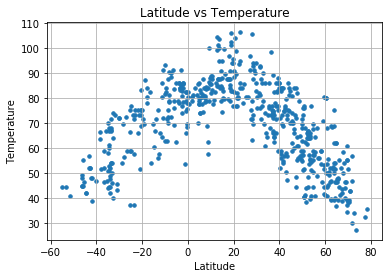

In [7]:
# Build scatter plot
plt.scatter(weather_data["Lat"],weather_data["Max Temp"], marker = "o", s = 12)

# Incorporate graph properties
plt.title("Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)

#Save the figure
plt.savefig("Latitude_vs_Temperature.png")

#Show plot
plt.show()

#### Latitude vs. Humidity Plot

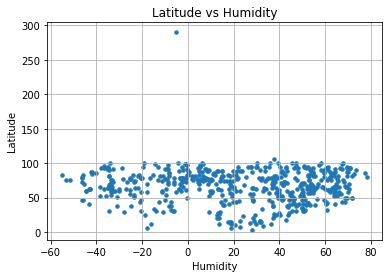

In [8]:
# Build scatter plot
plt.scatter(weather_data["Lat"],weather_data["Humidity"], marker = "o", s = 12)

plt.title("Latitude vs Humidity")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("Latitude_vs_Humidity.png")

#Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

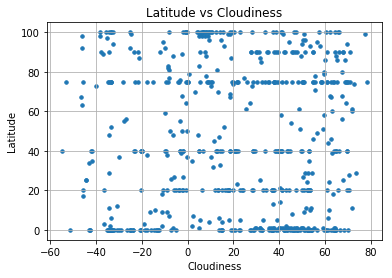

In [9]:
# Build scatter plot
plt.scatter(weather_data["Lat"],weather_data["Cloudiness"], marker = "o", s = 12)

plt.title("Latitude vs Cloudiness")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("Latitide_vs_Cloudiness.png")

#Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

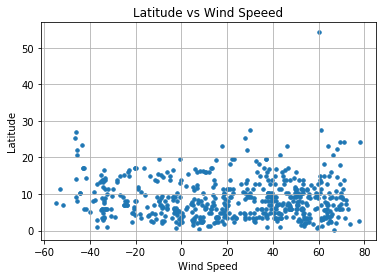

In [10]:
# Build scatter plot
plt.scatter(weather_data["Lat"],weather_data["Wind Speed"], marker = "o", s = 12)

plt.title("Latitude vs Wind Speeed")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("Latitude_vs_Wind_Speed.png")

#Show plot
plt.show()